In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Reading Dataset

In [ ]:
from google.colab import files
import io
try:
  uploaded
except:
  uploaded=files.upload()

In [ ]:
from google.colab import files
import io
try:
  uploaded_1
except:
  uploaded_1=files.upload()

Saving test_data (1).csv to test_data (1) (1).csv


In [ ]:
# Reading files
# train set
df=pd.read_csv("Train_data (1).csv")
# test set
data_1=pd.read_csv("test_data (1).csv")
# Assuming data and data_1 are your original DataFrames


## Pre-Processing of Dataset

In [ ]:
df.dtypes

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

In [ ]:
df.Disease.value_counts()

Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64

In [ ]:
df.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [ ]:
df.Disease = df.Disease.map({
    "Anemia":0,
    "Healthy":1,
    "Diabetes":2,
    "Thalasse":3,
    "Thromboc":4
})

In [ ]:
df.dtypes

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

## Dividing Dataset into X and y labels

In [ ]:
X = df.drop(["Disease"], axis=1)
y = df.Disease

## Dividing into training and testing data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=0)

## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
model.score(xtest, ytest)

1.0

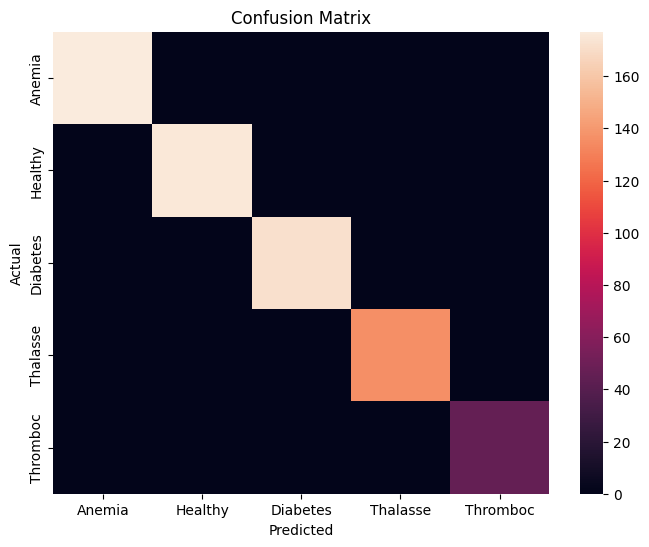

In [ ]:
preds = model.predict(xtest)
cm = confusion_matrix(ytest, preds)
cmdf = pd.DataFrame(cm, index=["Anemia","Healthy","Diabetes","Thalasse","Thromboc"], columns=["Anemia","Healthy","Diabetes","Thalasse","Thromboc"])
plt.figure(figsize=(8,6))
sns.heatmap(cmdf)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
cm

array([[177,   0,   0,   0,   0],
       [  0, 175,   0,   0,   0],
       [  0,   0, 172,   0,   0],
       [  0,   0,   0, 136,   0],
       [  0,   0,   0,   0,  46]])

## Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
model.score(xtest, ytest)

1.0

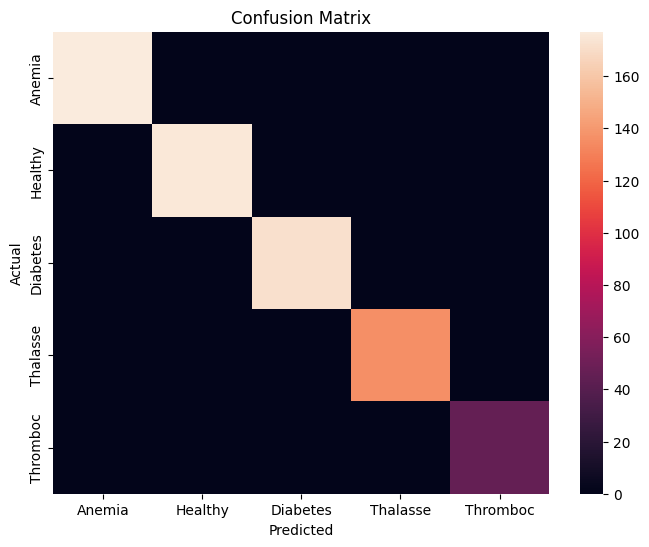

In [ ]:
preds = model.predict(xtest)
cm = confusion_matrix(ytest, preds)
cmdf = pd.DataFrame(cm, index=["Anemia","Healthy","Diabetes","Thalasse","Thromboc"], columns=["Anemia","Healthy","Diabetes","Thalasse","Thromboc"])
plt.figure(figsize=(8,6))
sns.heatmap(cmdf)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Similarly we can apply other Classifiers for the model. Since, we are achieving 100% accuracy (accuracy score of 1.0), I will not be going further with other classifiers or hyperparameter tuning.

We will see hyperparameter tuning in some other dataset where we would be required to optimize our algorithm for accuracy